### Kalman filter example

为了介绍卡尔曼滤波，我们生成如下模型，并用卡尔曼滤波算法对其进行估计：
\begin{equation}\label{eq:ex1}
\begin{array}{c}
y_t=\alpha_{t-1}+e_t\\
\alpha_{t}=.9 \alpha_{t-1}+u_t 
\end{array}
\end{equation}
其中
$\{sigma_e}^2=0.8,\{sigma_u}^2=0.4$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

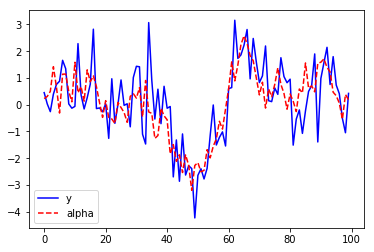

In [3]:
n=100
np.random.seed(1123)
e=np.sqrt(.8)*np.random.randn(n)
u=np.sqrt(.4)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
y[0]=e[0]
alpha[0]=u[0]
for t in range(1,n):
  y[t]=alpha[t-1]+e[t]
  alpha[t]=.9*alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  

现在假设不知道$\alpha$，对$y$执行卡尔曼滤波，由于$\alpha_t$是AR(1)过程，因此可以初始化$a_1=0,p_1=\frac{\sigma^2_u}{1-0.81}=0.21$。

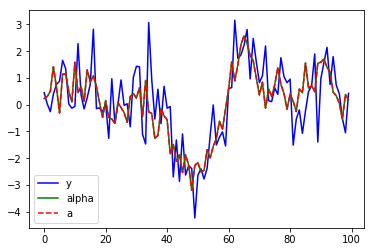

In [8]:
n=100
sigmae=.8
sigmau=.4
w=.9
z=1
a=np.zeros(n)
p=np.zeros(n)
a[0]=0
p[0]=2.11
k=np.zeros(n)
v=np.zeros(n)
#k[1]=(w*p[1])/(z^2*p[1]+sige)
for t in range(1,n):
  k[t]=(z*w*p[t-1])/((z**2)*p[t-1]+sigmae)
  p[t]=(w**2)*p[t-1]-w*z*k[t]*p[t-1]+sigmau
  v[t]=y[t]-z*a[t-1]
  a[t]=w*a[t-1]+k[t]*v[t]
plt.plot(y,'b',label='y')
plt.plot(alpha,'g',label='alpha')
plt.plot(alpha,'r--',label='a')
plt.legend()
plt.show()

可以看出，计算得出的$a$和实际的$\alpha$吻合地很好。

小练习：
生成如下模型
$$\begin{array}{c}y_t=1.05*\alpha_{t-1}+e_t\\\alpha_{t}=.5+.8 \alpha_{t-1}+u_t \end{array}$$
其中$\sigma^2_e=2,\sigma^2_u=0.3$，执行如下步骤：

（1）生成这个时间序列；

（2）对这个时间序列执行卡尔曼滤波；

（3）作图画出结果

我们定义两个函数完成上述过程：

In [12]:
def StateSpaceGen(sigmae,sigmau,z,w,const):
    
    # 该函数生成一个state space里的时间序列，并作图，输出y和alpha
    
    n=100
    e=np.sqrt(sigmae)*np.random.randn(n)
    u=np.sqrt(sigmau)*np.random.randn(n)
    y=np.zeros(100)
    alpha=np.zeros(100)
    y[0]=e[0]
    alpha[0]=u[0]
    for t in range(1,n):
        y[t]=z*alpha[t-1]+e[t]
        alpha[t]=const+w*alpha[t-1]+u[t] 
    plt.plot(y,'b',label="y")
    plt.plot(alpha,'r--',label="alpha")
    plt.legend()
    plt.title('Generated series')
    plt.show()
    return y,alpha

def KF(sigmae,sigmau,z,w,const,y):
    
    # 该函数对生成时间序列y进行卡尔曼滤波
    
    a=np.zeros(100)
    p=np.zeros(100)
    a[0]=y[0]
    p[0]=10000
    if w<1:
        a[0]=0
        p[0]=sigmau/(1-w**2)
    k=np.zeros(100)
    v=np.zeros(100)
    k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
    p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau
    v[t]=y[t]-z*a[t-1]
    a[t]=const+w*a[t-1]+k[t]*v[t]
    return a,v,k,p

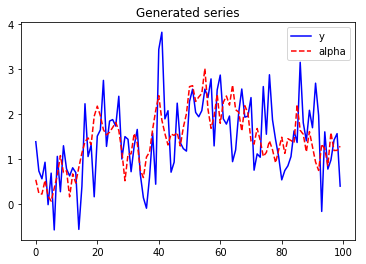

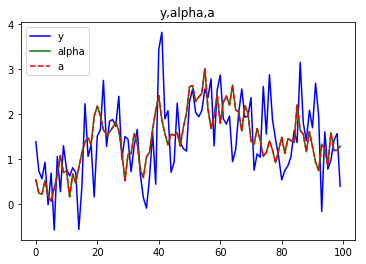

In [13]:
np.random.seed(222)
y,alpha=StateSpaceGen(0.5,0.1,1,0.8,0.3)
a,v,k,p=KF(0.5,0.1,1,0.8,0.3,y)
plt.plot(y,'b',label='y')
plt.plot(alpha,'g',label='alpha')
plt.plot(alpha,'r--',label='a')
plt.title("y,alpha,a")
plt.legend()
plt.show()